## Chapter3. Question13
### In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

### (a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [2]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)

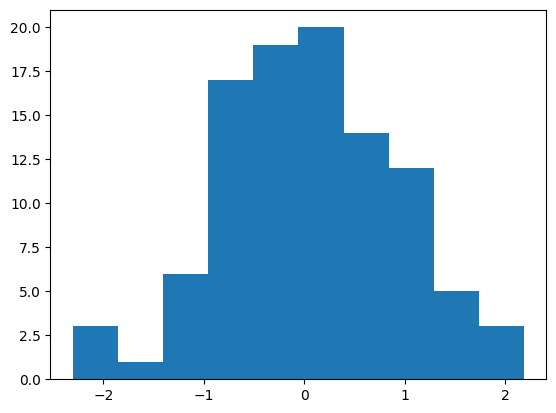

In [3]:
plt.hist(x)
plt.show()

### (b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [4]:
eps = np.random.normal(0, 0.25, 100)

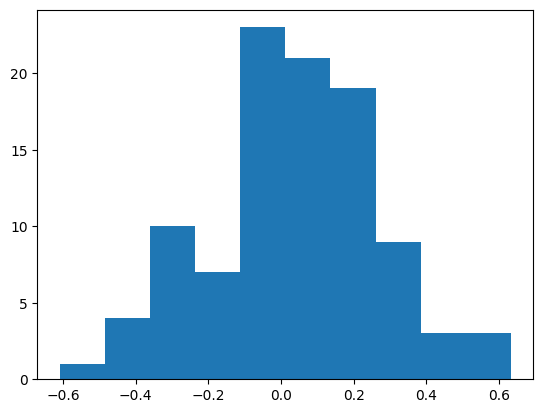

In [5]:
plt.hist(eps)
plt.show()

### (c) Using x and eps, generate a vector y according to the model
$$
Y = -1 + 0.5X + \varepsilon \quad (3.39)
$$
### What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [6]:
y = -1 + 0.5 * x + eps

print("Length of vector y:", len(y))
print("β0 (intercept):", -1)
print("β1 (slope):", 0.5)

Length of vector y: 100
β0 (intercept): -1
β1 (slope): 0.5


### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

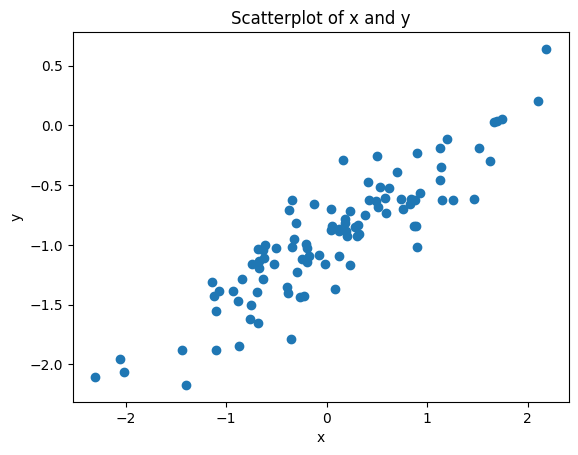

In [7]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of x and y")
plt.show()

### Comment on the observation:

The scatterplot shows a **positive linear relationship** between x and y.

As the value of x increases, the value of y tends to increase as well.

This is consistent with the linear model we used to generate the data, where the slope (β1) is positive (0.5).

The scatterplot also shows some dispersion around the linear relationship, which is due to the random error term (ε).

### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [8]:
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
model = sm.ols('y ~ x', data=df).fit()
print(model.summary())

beta_hat_0 = model.params['Intercept']
beta_hat_1 = model.params['x']

print("\nEstimated β0 (intercept):", round(beta_hat_0, 4))
print("Estimated β1 (slope):", round(beta_hat_1, 4))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.39e-36
Time:                        11:38:28   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

### Comment on the model obtained:

The **model summary** provides information about the fitted linear model,
including the estimated coefficients, standard errors, t-statistics,
and p-values. The R-squared value indicates the proportion of variance in y that is explained by x.

### How do βˆ0 and βˆ1 compare to β0 and β1?

The estimated coefficients (βˆ0 and βˆ1) are close to the true
coefficients (β0 and β1).

This suggests that the least squares method has successfully
estimated the linear relationship between x and y with error less than 0.05.
The difference between βˆ0 and β0, and βˆ1 and β1, is due to
the presence of random error in the data.

### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

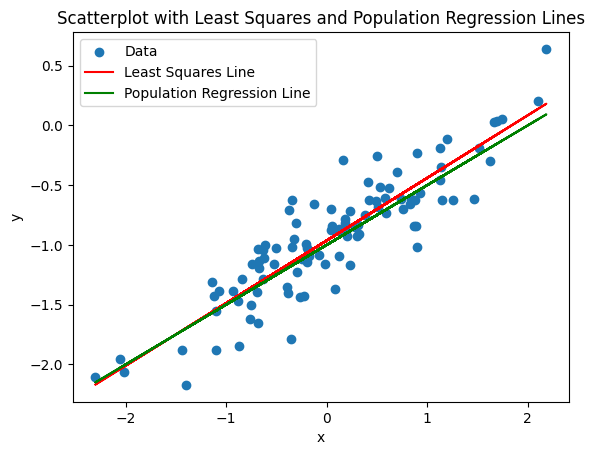

In [9]:
y_pred = model.predict()
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Least Squares Line')
plt.plot(x, -1 + 0.5 * x, color='green', label='Population Regression Line')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot with Least Squares and Population Regression Lines")
plt.legend()
plt.show()

### (g) Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [10]:
df['x2'] = df['x']**2
model_quadratic = sm.ols('y ~ x + x2', data=df).fit()
print(model_quadratic.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.32e-34
Time:                        11:38:28   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.029    -33.486      0.0

### Is there evidence that the quadratic term improves the model fit?

Based on the p-value of 0.856, there is **no evidence that the quadratic term (x2) improves the model fit**. We can consider removing the quadratic term to simplify the model without losing predictive power.

### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term epison in (b). Describe your results.

Length of vector y: 100
true β0 (intercept): -1
true β1 (slope): 0.5
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.58e-70
Time:                        11:38:28   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

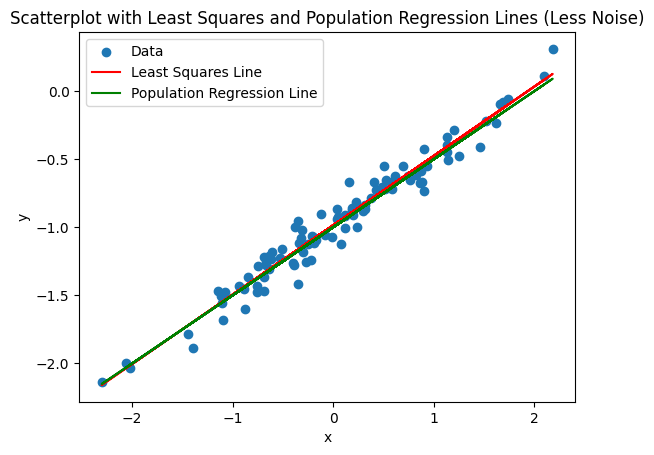

In [11]:
np.random.seed(1)
x_less_noisy = np.random.normal(0, 1, 100)
eps_less_noisy = np.random.normal(0, 0.1, 100)
y_less_noisy = -1 + 0.5 * x_less_noisy + eps_less_noisy

print("Length of vector y:", len(y_less_noisy))
print("true β0 (intercept):", -1)
print("true β1 (slope):", 0.5)


data = {'x': x_less_noisy, 'y': y_less_noisy}
df = pd.DataFrame(data)
model_less_noisy = sm.ols('y ~ x', data=df).fit()
print(model_less_noisy.summary())

beta_hat_0 = model_less_noisy.params['Intercept']
beta_hat_1 = model_less_noisy.params['x']

print("\nEstimated β0 (intercept):", round(beta_hat_0, 4))
print("Estimated β1 (slope):", round(beta_hat_1, 4))

y_pred = model_less_noisy.predict()
plt.scatter(x_less_noisy, y_less_noisy, label='Data')
plt.plot(x_less_noisy, y_pred, color='red', label='Least Squares Line')
plt.plot(x_less_noisy, -1 + 0.5 * x_less_noisy, color='green', label='Population Regression Line')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot with Least Squares and Population Regression Lines (Less Noise)")
plt.legend()
plt.show()

Description of Results with less noise:

By decreasing the variance of the error term, the data points are now more closely clustered around the population regression line.
* This leads to a better fit of the least squares line to the true relationship between x and y.
* The estimated coefficients (βˆ0 and βˆ1) are now even closer to the true coefficients (β0 and β1) compared to the results with higher noise.
* The R-squared value of the model will likely be higher, indicating that a larger portion of the variation in y is explained by x when there is less noise.
* In essence, with less noise, the linear model is **more accurate** in capturing the underlying relationship between the variables.

### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term " in (b). Describe your results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.60
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.79e-07
Time:                        11:38:28   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8530      0.094     -9.076      0.0

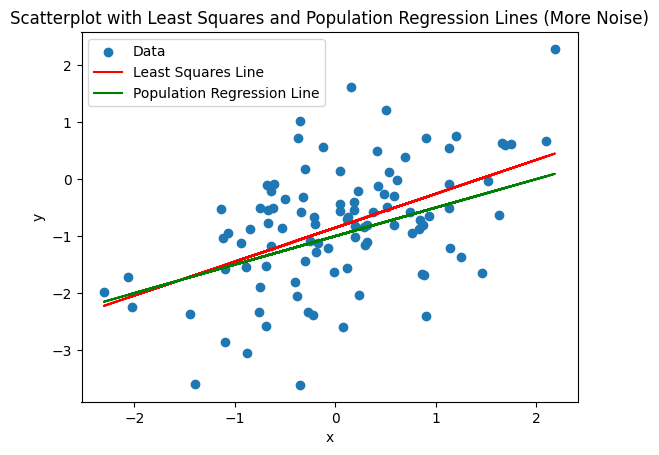

In [12]:
np.random.seed(1)
x_noisier = np.random.normal(0, 1, 100)
eps_noisier = np.random.normal(0, 1, 100)
y_noisier = -1 + 0.5 * x_noisier + eps_noisier


data = {'x': x_noisier, 'y': y_noisier}
df = pd.DataFrame(data)
model_noisier = sm.ols('y ~ x', data=df).fit()
print(model_noisier.summary())

beta_hat_0 = model_noisier.params['Intercept']
beta_hat_1 = model_noisier.params['x']

print("\nEstimated β0 (intercept):", round(beta_hat_0, 4))
print("Estimated β1 (slope):", round(beta_hat_1, 4))


y_pred = model_noisier.predict()
plt.scatter(x_noisier, y_noisier, label='Data')
plt.plot(x_noisier, y_pred, color='red', label='Least Squares Line')
plt.plot(x_noisier, -1 + 0.5 * x_noisier, color='green', label='Population Regression Line')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot with Least Squares and Population Regression Lines (More Noise)")
plt.legend()
plt.show()

Description of results with more noise:
* The scatterplot shows a less clear linear relationship compared to the original data with less noise.
* The estimated coefficients (βˆ0 and βˆ1) are likely to have larger difference from the true coefficients (β0 and β1) due to the increased influence of noise.
* The R-squared value of the model is likely to be lower, indicating that the model explains less of the variance in y.
* The least squares line may appear less accurate in fitting the data due to the increased noise.

### (j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [13]:
print("Confidence Intervals for Original Data Set:")
print(model.conf_int())

# Less noisy data set (from part h)
print("\nConfidence Intervals for Less Noisy Data Set:")
print(model_less_noisy.conf_int())

# Noisier data set (from part i)
print("\nConfidence Intervals for Noisier Data Set:")
print(model_noisier.conf_int())

Confidence Intervals for Original Data Set:
                  0         1
Intercept -1.009870 -0.916623
x          0.471307  0.576407

Confidence Intervals for Less Noisy Data Set:
                  0         1
Intercept -1.003948 -0.966649
x          0.488523  0.530563

Confidence Intervals for Noisier Data Set:
                  0         1
Intercept -1.039482 -0.666491
x          0.385227  0.805628


### Conclusion:

As noise decreases, the confidence intervals narrow, indicating more precise parameter estimates.

As noise increases, the confidence intervals widen, reflecting more uncertainty in the estimates.

For both the intercept and x, the less noisy data set yields the most reliable and precise estimates, while the noisier data set introduces significant uncertainty.





